Nom 1: Eic Escrich

Nom 2: Adrià Vilariño

# Repte 1: Fashion

## Enunciat
Descarrega el dataset **fashion_mnist** de la secció de datasets de la llibreria TensorFlow i crea una xarxa neuronal capaç d'identificar les diferents peces de roba. Els valors de les etiquetes de sortida corresponen a les següents classes:

>0: T-shirt/top<br>
>1: Trouser<br>
>2: Pullover<br>
>3: Dress<br>
>4: Coat<br>
>5: Sandal<br>
>6: Shirt<br>
>7: Sneaker<br>
>8: Bag<br>
>9: Ankle boot<br>



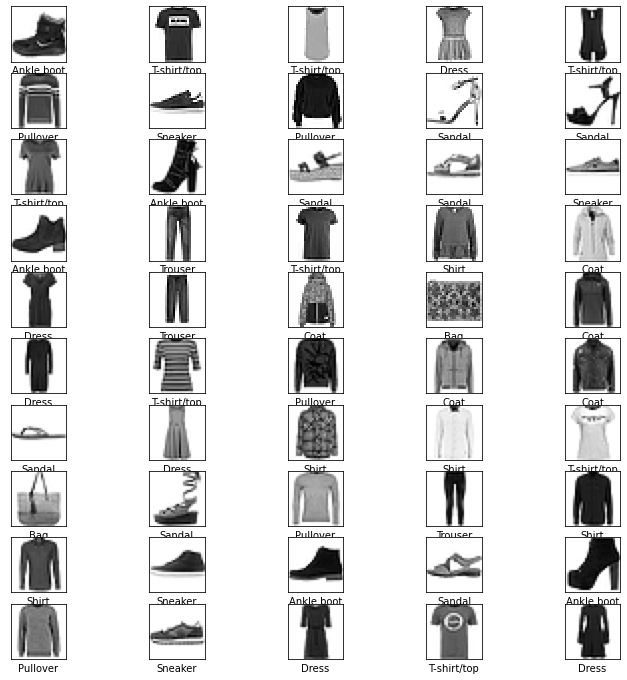

In [1]:
# Importem llibreries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Descarreguem el dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [2]:
# Creem una llista amb els noms de les peces de roba
roba_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
# Normalitzem dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Comprovem la forma de les dades
print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
float32
uint8


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

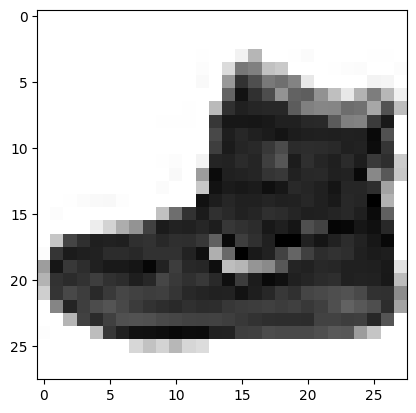

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078432 0.7372549
  0.40392157 0.21176471 0.1882353  0.16862746 0.34117648 0.65882355
  0.52156866 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215687 0.53333336 0.85882354 0.84705883 0.89411765
  0.9254902  1.         1.         1.         1.         0.8509804
  0.84313726 0.99607843 0.90588236 0.627451   0.1764706  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.6901961  0.87058824 0.8784314  0.83137256 0.79607844 0.7764706
  0.76862746 0.78431374 0.84313726 0.8        0.7921569  0.7882353
  0.7882353  0.7882353  0.81960785 0.85490197 0.8784314  0.6431373
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
  0.8

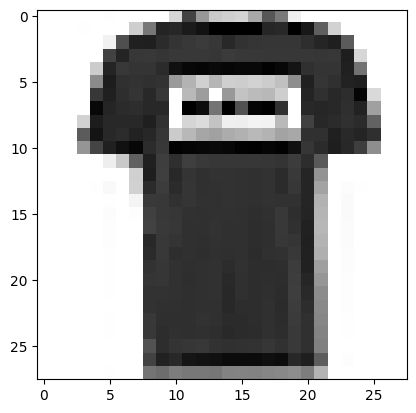

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.08627451 0.4627451  0.09411765
  0.         0.         0.         0.         0.         0.1882353
  0.34509805 0.01960784 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04705882 0.39215687 0.83137256 0.8039216
  0.7254902  0.7019608  0.6784314  0.7294118  0.75686276 0.8666667
  0.5568628  0.33333334 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.33333334 0.29803923 0.78039217
  0.88235295 0.972549   1.         0.93333334 0.8862745  0.6156863
  0.26666668 0.3137255  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         

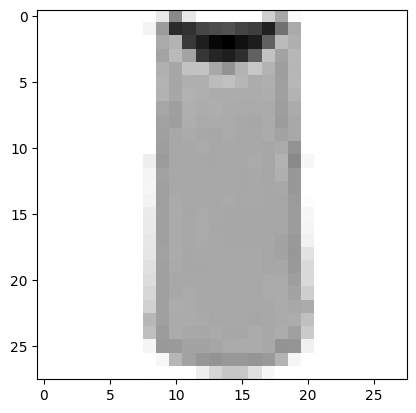

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.12941177 0.3764706  0.6862745  0.6117647
  0.2509804  0.05490196 0.21176471 0.5372549  0.8        0.7607843
  0.4        0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.28627452 0.7294118  0.69411767 0.7176471  0.6862745  0.7372549
  0.9098039  1.         0.8745098  0.85882354 0.7607843  0.7019608
  0.7294118  0.8352941  0.57254905 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.13725491
  0.6392157  0.54901963 0.5882353  0.59607846 0.5882353  0.57254905
  0.6862745  0.6862745  0.6784314  0.67058825 0.6117647  0.59607846
  0.5803922  0.5058824  0.6117647  0.54901963 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5882353
  0.5568628  0.54901

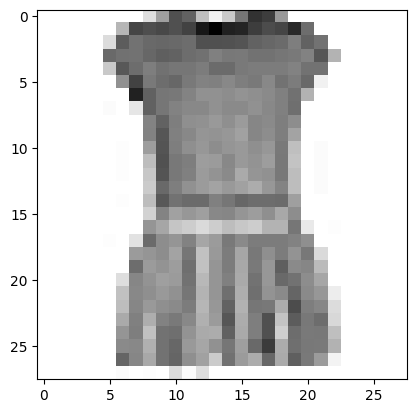

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.10196079
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.7411765  0.80784315 0.73333335 0.1254902
  0.         0.         0.         0.10196079 0.8509804  0.8862745
  0.76862746 0.04313726 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.7529412  0.8901961  0.91764706 0.9529412
  0.9019608  0.5764706  0.9372549  0.9490196  0.91764706 0.85490197
  0.81960785 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.6784314  0.88235

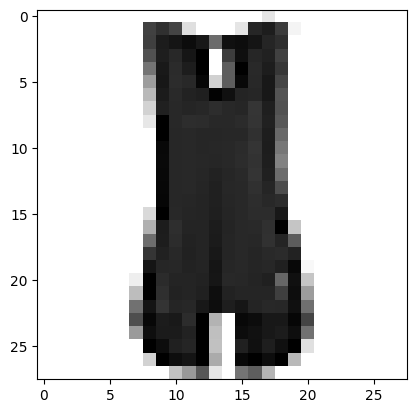

[[0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.08627451 0.34509805 0.7372549
  0.6745098  0.5176471  0.49019608 0.5529412  0.78039217 0.56078434
  0.03529412 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.07843138 0.5137255  0.78039217 0.80784315 0.76862746 0.7921569
  0.9490196  1.         1.         0.98039216 0.87058824 0.77254903
  0.80784315 0.7372549  0.49411765 0.06666667 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.13725491
  0.8392157  0.7490196  0.7176471  0.69803923 0.6862745  0.65882355
  0.5882353  0.63529414 0.62352943 0.59607846 0.61960787 0.7019608
  0.7176471  0.7411765  0.7647059  0.7254902  0.32156864 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.6666667
  0.74509805 0.6745

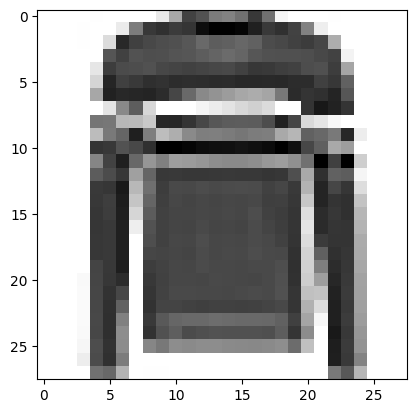

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

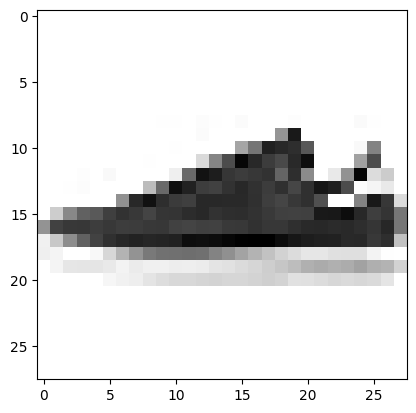

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941177 0.33333334
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.9882353
  0.972549   0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784315 0.95686275 0.9843137  0.94509804 0.9019608
  0.93333334 0.8666667  0.8039216  0.9019608  0.9411765  0.9019608
  0.9372549  0.9843137  0.9137255  0.64705884 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039217 0.984

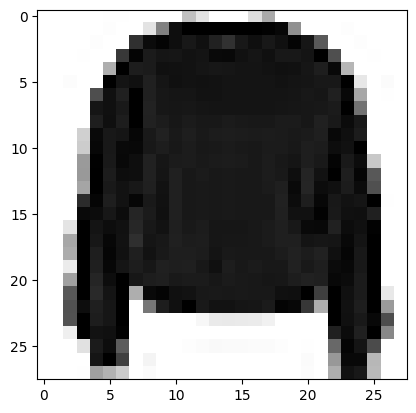

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.01176471 0.00392157 0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.22745098
  0.         0.15294118 0.00392157 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

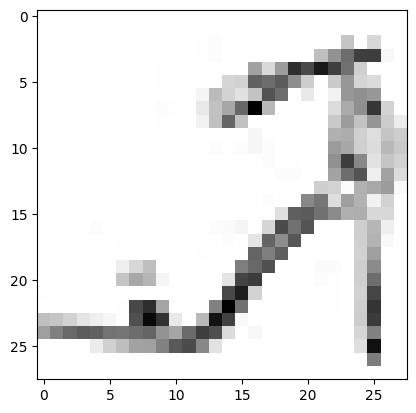

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.00392157 0.         0.         0.
  0.         0.         0.         0.         0.6431373  0.19607843
  0.         0.02745098 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.         0.00392157
  0

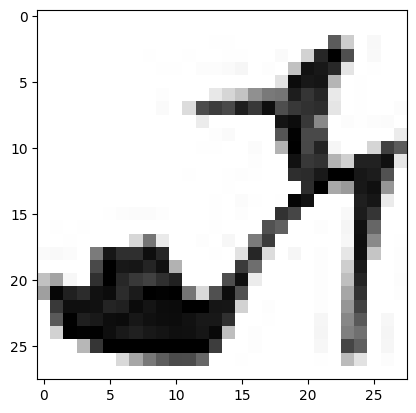

[[0.         0.         0.         0.         0.         0.
  0.         0.04313726 0.5568628  0.78431374 0.41568628 0.
  0.         0.         0.         0.         0.         0.
  0.33333334 0.7254902  0.4392157  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.59607846 0.8392157  0.8509804  0.7607843  0.9254902  0.84705883
  0.73333335 0.58431375 0.5294118  0.6        0.827451   0.8509804
  0.90588236 0.8039216  0.8509804  0.7372549  0.13333334 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25882354
  0.7254902  0.6509804  0.7058824  0.70980394 0.74509805 0.827451
  0.8666667  0.77254903 0.57254905 0.7764706  0.80784315 0.7490196
  0.65882355 0.74509805 0.6745098  0.7372549  0.6862745  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5294118
  0.6        0.627451   0.6862745  0

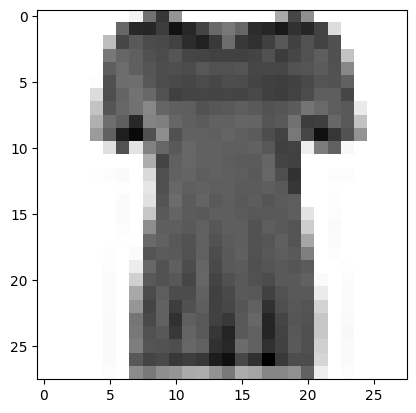

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.15294118 0.43529412 0.3647059  0.33333334
  0.10588235 0.         0.         0.         0.         0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.74509805 0.95686275 0.972549   1.
  1.         0.60784316 0.7921569  0.83137256 0.5882353  0.03529412
  0.         0.01176471 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.8352941  0.8901961  0.9137255  0.8901961
  0.9529412  0.9647059  1.         0.98039216 1.         0.57254905
  0.         0.03529412 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.      

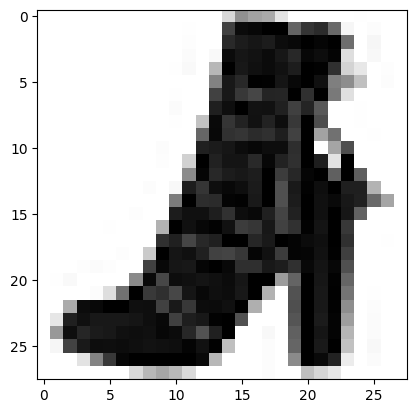

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

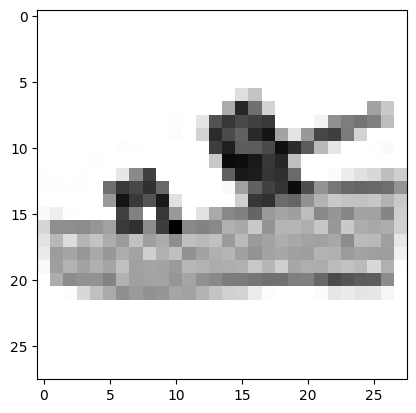

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

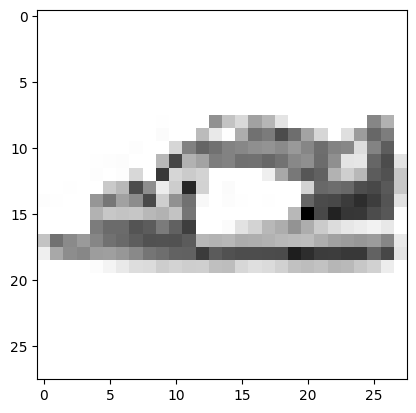

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

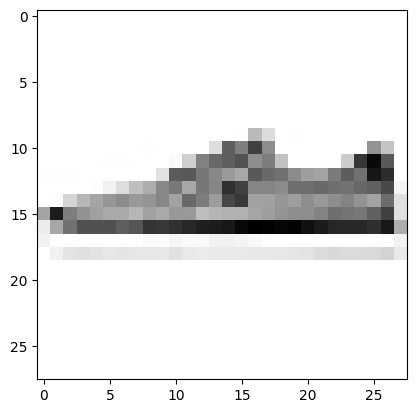

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

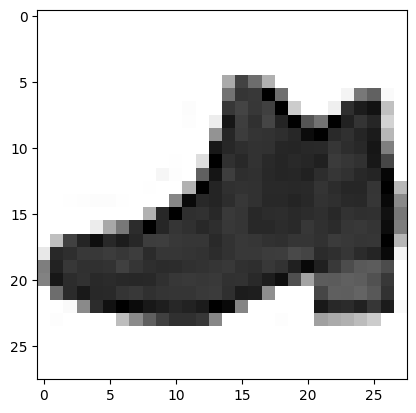

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.20784314 0.57254905 0.49803922
  0.4509804  0.43529412 0.50980395 0.5058824  0.39215687 0.5764706
  0.6627451  0.74509805 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.45882353 0.74509805 0.7372549
  0.8666667  0.91764706 0.99607843 0.9254902  0.8666667  0.8039216
  0.7294118  0.87058824 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.49803922 0.6117647  0.6862745
  0.75686276 0.7647059  0.7647059  0.7921569  0.79607844 0.73333335
  0.65882355 0.89411765 0.1254902  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         

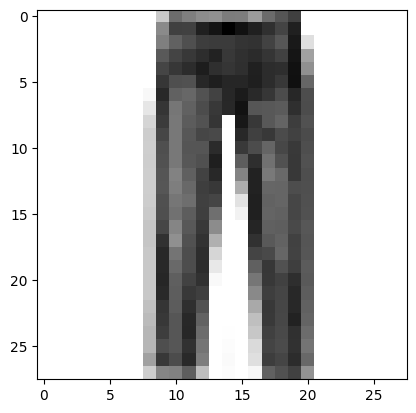

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.07450981
  0.01568628 0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.00784314 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.28235295 0.6156863  0.87058824
  0.95686275 0.9882353  0.5803922  0.7764706  0.78431374 0.94509804
  0.7882353  0.18039216 0.         0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.12156863 0.78431374 0.827451   0.8862745  0.8784314  0.8039216
  0.827451   0.9490196  0.83137256 0.9647059  0.9607843  0.7607843
  0.8117647  0.83137256 0.8627451  0.47058824 0.         0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.74509805 0.8509804  0.7843137

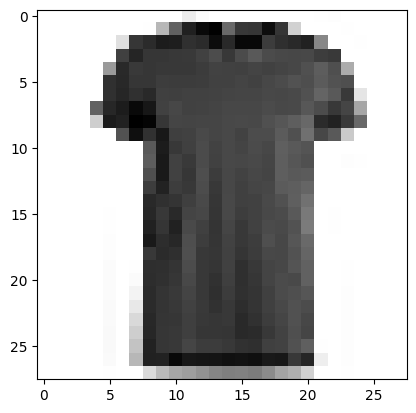

[[0.         0.         0.         0.00784314 0.         0.00784314
  0.         0.         0.02352941 0.14117648 0.30980393 0.09411765
  0.         0.         0.         0.         0.         0.12156863
  0.28627452 0.00392157 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.00784314 0.
  0.         0.6        0.627451   0.6        0.6901961  0.7411765
  0.7372549  0.7607843  0.5686275  0.6039216  0.58431375 0.7529412
  0.7019608  0.5686275  0.6313726  0.3254902  0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00784314 0.         0.
  0.5294118  0.6666667  0.5647059  0.5882353  0.5764706  0.63529414
  0.73333335 0.41568628 0.00392157 0.78431374 0.69411767 0.6509804
  0.57254905 0.58431375 0.5921569  0.6627451  0.44313726 0.
  0.01176471 0.         0.         0.        ]
 [0.         0.         0.         0.01568628 0.         0.13333334
  0.701960

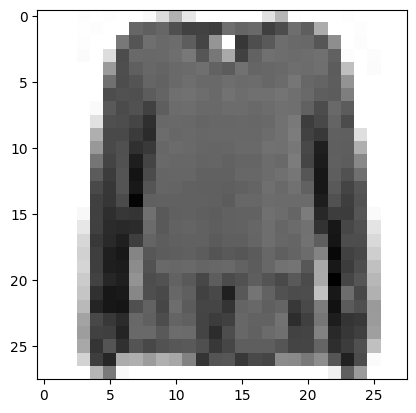

[[0.         0.         0.         0.         0.         0.
  0.         0.00784314 0.         0.         0.04705882 0.21568628
  0.38431373 0.20392157 0.1764706  0.27450982 0.18431373 0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.15294118 0.20392157 0.3647059
  0.5647059  0.3254902  0.25882354 0.3372549  0.30588236 0.1882353
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.13725491 0.2627451  0.14117648 0.4627451
  0.5921569  0.23529412 0.10980392 0.24705882 0.17254902 0.23529412
  0.20392157 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.2        0.16862

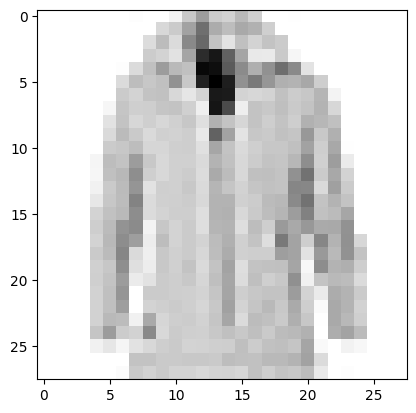

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.25490198 0.3882353  0.
  0.         0.         0.         0.         0.         0.
  0.41568628 0.23529412 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.         0.06666667 0.74509805 0.80784315 0.7921569  0.5686275
  0.5803922  0.57254905 0.5803922  0.6509804  0.64705884 0.7411765
  0.83137256 0.8235294  0.7921569  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.627451   0.8980392  0.75686276 0.7411765  0.77254903
  0.6627451  0.7137255  0.42745098 0.64705884 0.6117647  0.7921569
  0.7764706  0.76862746 0.9137255  0.3764706  0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.78039217 0.7764706 

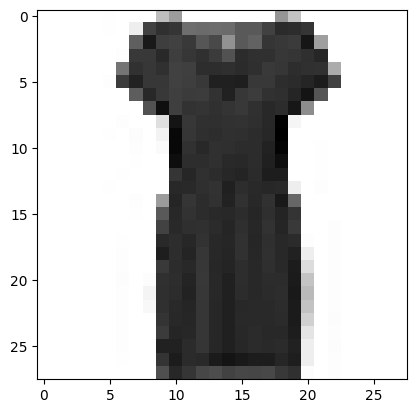

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.03529412 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01568628 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.02352941 0.11764706 0.01176471
  0.01568628 0.01568628 0.05098039 0.08235294 0.11764706 0.19215687
  0.12156863 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.61960787 0.8980392  0.8392157
  0.84313726 0.8156863  0.83137256 0.84313726 0.8392157  0.8901961
  0.89411765 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.7921569  0.8

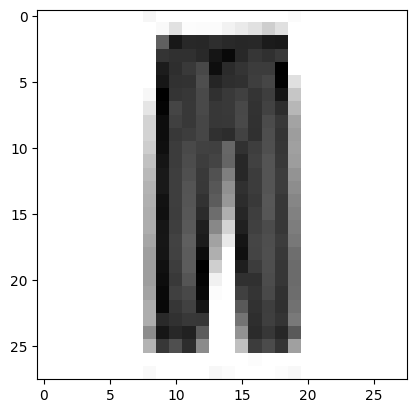

[[0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.00392157 0.00392157 0.         0.
  0.10588235 0.40392157 0.47058824 0.49019608 0.23137255 0.
  0.         0.00392157 0.         0.00392157 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.00392157 0.         0.         0.29411766
  0.69803923 0.627451   0.54509807 0.54901963 0.6509804  0.38431373
  0.         0.         0.         0.00392157 0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.         0.31764707 0.6862745
  0.7176471  0.6156863  0.5882353  0.5137255  0.5137255  0.6431373
  0.18431373 0.         0.00784314 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.6

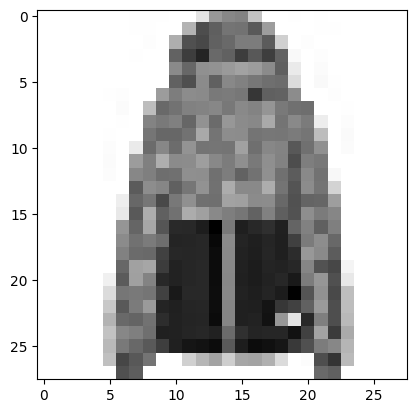

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.00392157 0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.         0.00392157
  0.       

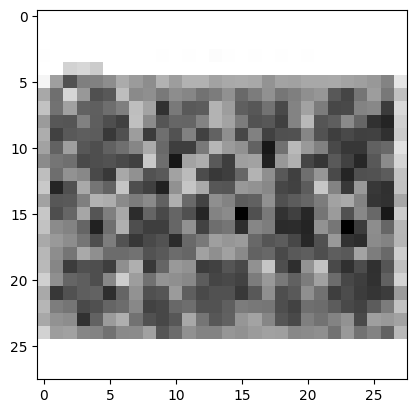

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.3529412  0.6117647
  0.69411767 0.7137255  0.76862746 0.6901961  0.45882353 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.         0.         0.9372549  0.99215686 0.9372549
  0.8392157  0.8862745  0.8392157  0.90588236 0.9607843  0.972549
  0.         0.         0.00392157 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.14117648 0.94509804 0.79607844 0.85882354
  0.7529412  0.74509805 0.75686276 0.8117647  0.78431374 0.9098039
  0.5294118  0.         0.         0.00784314 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.12941177 0.654902   0.8901961

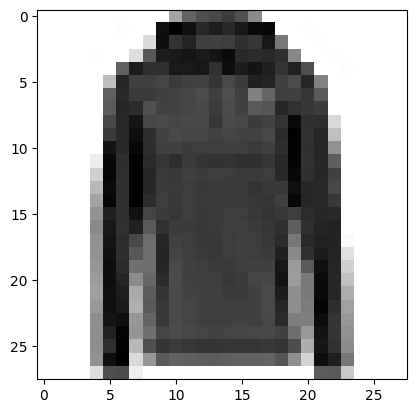

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.05490196
  0.         0.         0.         0.         0.2        0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.54509807 0.8392157  0.85490197
  0.8627451  0.6431373  0.80784315 0.9529412  0.9137255  0.8039216
  0.3647059  0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.50980395 0.99215686 0.88235295 0.8862745
  0.9137255  0.8980392  0.9098039  0.9019608  0.85882354 0.8901961
  0.9764706  0.24705882 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.79607844 0.92941

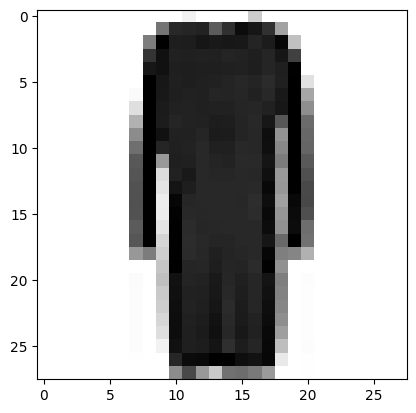

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.22745098 0.4745098  0.85490197 0.43137255
  0.22745098 0.16470589 0.21176471 0.33333334 0.6901961  0.89411765
  0.4745098  0.12941177 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.07058824
  0.25882354 0.5058824  0.5803922  0.4745098  0.58431375 0.99607843
  1.         1.         1.         1.         0.73333335 0.34117648
  0.49411765 0.5568628  0.44313726 0.18039216 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.01568628 0.         0.32156864 0.9372549
  0.8117647  0.7058824  0.63529414 0.62352943 0.56078434 0.6039216
  0.7058824  0.6901961  0.6901961  0.5686275  0.49803922 0.60784316
  0.6039216  0.64705884 0.7490196  0.85882354 0.7176471  0.16078432
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.46666667 0.5411765
  

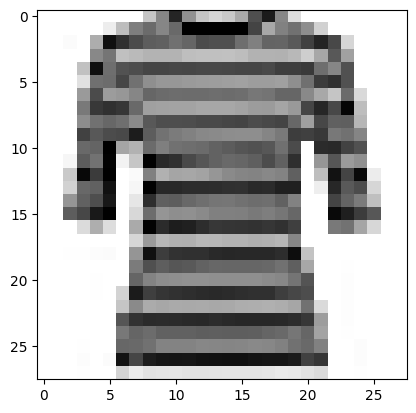

[[0.         0.         0.         0.00392157 0.         0.
  0.         0.         0.         0.27450982 0.6784314  0.7921569
  0.6627451  0.7058824  0.7019608  0.7137255  0.85882354 0.7019608
  0.23921569 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.1254902  0.7058824  0.92941177 0.972549   0.9098039  0.91764706
  1.         1.         1.         1.         0.92156863 0.91764706
  1.         0.9254902  0.7490196  0.1254902  0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.01568628 0.         0.18431373
  0.88235295 0.8627451  0.7921569  0.78039217 0.75686276 0.8156863
  0.7490196  0.8039216  0.7019608  0.85490197 0.827451   0.70980394
  0.7921569  0.83137256 0.8862745  0.9019608  0.23137255 0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.73333335
  0.91764706 0.815

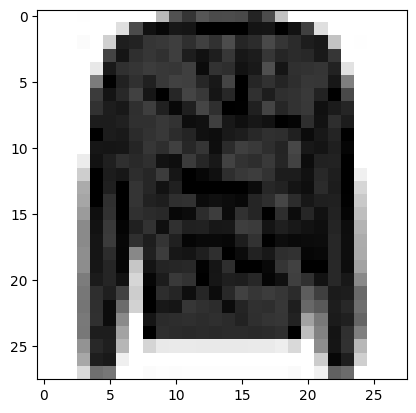

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00392157 0.         0.03137255 0.3137255  0.58431375 0.74509805
  0.68235296 0.7607843  0.74509805 0.68235296 0.72156864 0.5019608
  0.17254902 0.         0.         0.01176471 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.01960784
  0.         0.09411765 0.85882354 0.8901961  0.6745098  0.84705883
  0.8392157  0.7764706  0.7882353  0.8509804  0.8156863  0.67058825
  0.80784315 0.64705884 0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.43137255 0.7176471  0.521

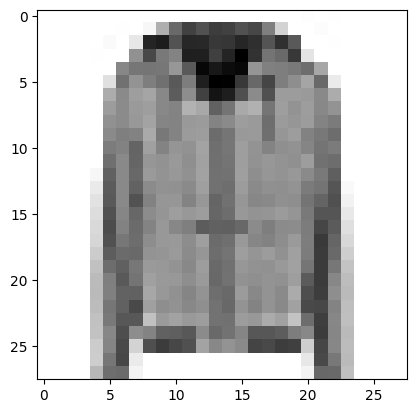

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.23137255 0.1882353  0.16862746 0.22352941 0.03137255 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.8392157
  0.95686275 0.85882354 0.8509804  0.8901961  0.85882354 0.
  0.         0.00784314 0.00392157 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.02352941 0.         0.         0.4627451  0.8901961
  0.8627451  0.8784314  0.85882354 0.8784314  0.8745098  0.7921569
  0.         0.         0.         0.01960784 0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.         0.61960787 0.81

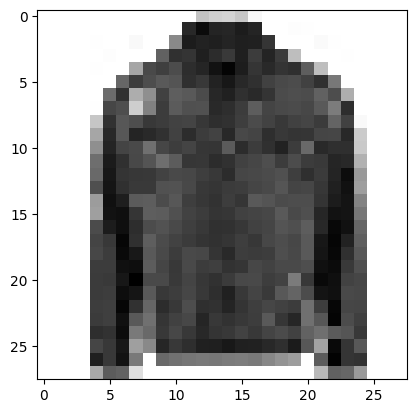

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

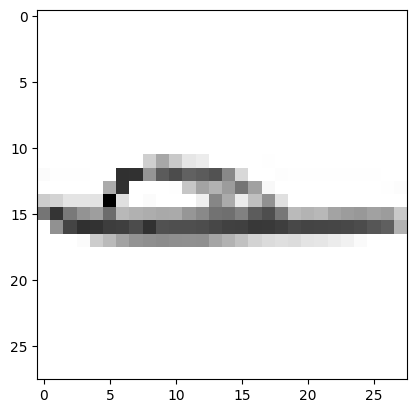

[[0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.58431375 0.16078432
  0.         0.         0.         0.         0.19215687 0.58431375
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.00784314 0.5411765  0.69803923
  0.6509804  0.5137255  0.53333336 0.67058825 0.6666667  0.5137255
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.00392157 0.49019608 0.5529412
  0.58431375 0.58431375 0.6        0.654902   0.54901963 0.5254902
  0.         0.         0.00392157 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157

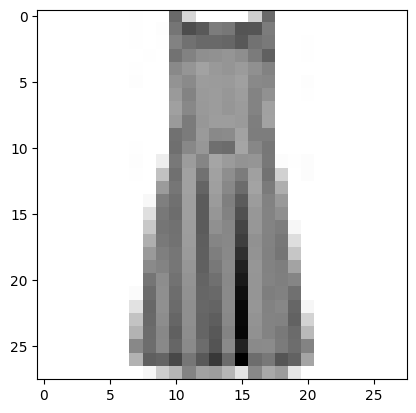

[[0.         0.         0.         0.         0.         0.00392157
  0.00784314 0.         0.         0.         0.         0.22745098
  0.34509805 0.4        0.30588236 0.39215687 0.5019608  0.36862746
  0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.00392157
  0.00392157 0.00784314 0.         0.         0.03529412 0.83137256
  0.67058825 0.7647059  0.6901961  0.87058824 0.7372549  0.7294118
  0.23137255 0.         0.00392157 0.00392157 0.01176471 0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.72156864 0.68235296
  0.73333335 0.64705884 0.7137255  0.54509807 0.5372549  0.8156863
  0.6313726  0.12156863 0.         0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.     

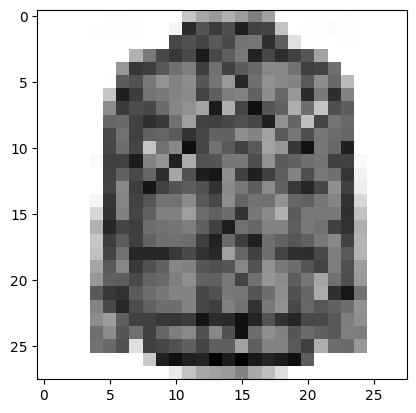

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.         0.03137255
  0.88235295 0.76862746 0.78431374 0.9490196  0.5176471  0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.08235294
  0.8784314  0.8        0.8117647  0.6392157  0.4509804  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.05490196 0.12156863 0.15686275 0.
  0.5254902  0.99607843 0.98039216 0.84705883 0.09019608 0.02352941
  0.13725491 0.07450981 0.01568628 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05490196 0.14901961 0.10588235 0.10588235 0.0823529

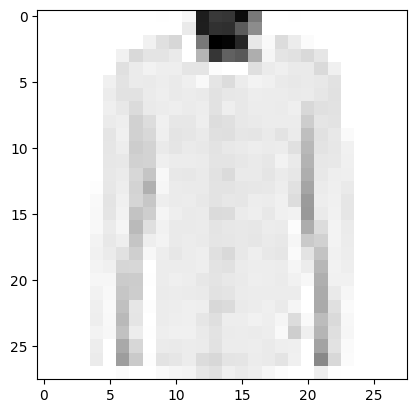

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.16470589 0.43137255 0.00392157
  0.         0.         0.         0.         0.         0.6117647
  0.08235294 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.1254902  0.21960784 0.15686275 0.08235294 0.7647059  0.6666667
  0.6784314  0.75686276 0.7176471  0.7176471  0.9529412  0.5294118
  0.01176471 0.15686275 0.17254902 0.15686275 0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.1882353
  0.19607843 0.09803922 0.02745098 0.00392157 0.00392157 0.14901961
  0.6784314  1.         0.8627451  0.6039216  0.09019608 0.
  0.         0.         0.05098039 0.1254902  0.20392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.09803922 0.14901961
  0.09803922 0.0745

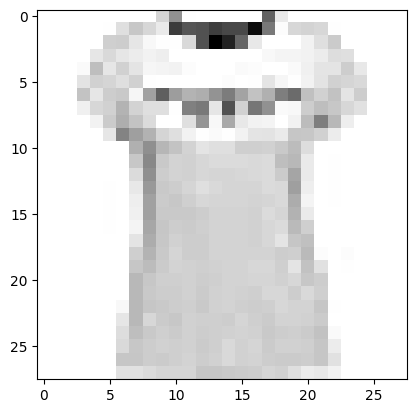

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.01568628
  0.         0.14509805 0.7764706  0.02352941 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00784314 0.
  0.03137255 0.38431373 0.16078432 0.44313726 0.         0.00784314
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00784314 0.
  0.29803923 0.32156864 0.         0.7921569  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.01568628 0.
  0

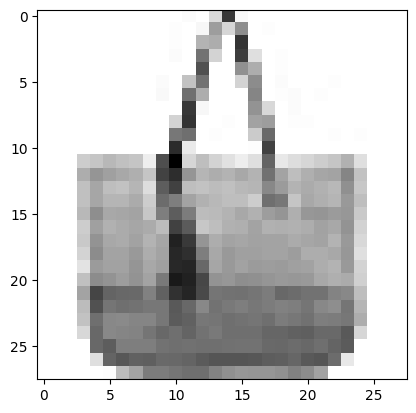

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.20784314 0.4        0.5647059  0.6627451  0.58431375
  0.12941177 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.41568628
  0.50980395 0.4627451  0.42352942 0.28627452 0.35686275 0.80784315
  0.92156863 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.58431375
  0.5372549  0.47843137 0.2784314  0.         0.         0.5372549
  0.8980392  0.14509805 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

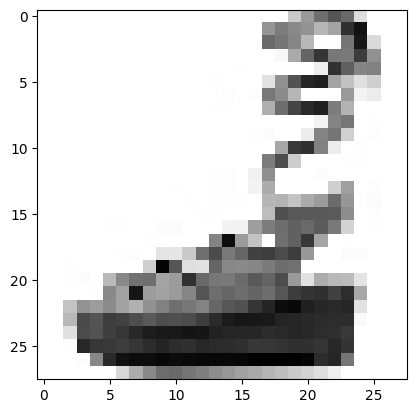

[[0.         0.         0.00392157 0.00392157 0.         0.00392157
  0.         0.         0.         0.         0.13333334 0.37254903
  0.         0.         0.         0.         0.20392157 0.27450982
  0.         0.         0.         0.00784314 0.00392157 0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.00392157 0.
  0.         0.04313726 0.23137255 0.43529412 0.44313726 0.7137255
  0.6627451  0.8862745  1.         0.7372549  0.6862745  0.63529414
  0.4117647  0.33333334 0.12156863 0.         0.         0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.00392157 0.         0.         0.10588235
  0.34901962 0.49803922 0.49803922 0.4509804  0.39607844 0.3372549
  0.31764707 0.37254903 0.35686275 0.34509805 0.30588236 0.36078432
  0.4509804  0.53333336 0.54509807 0.49411765 0.28627452 0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.19215687 0.45882353
 

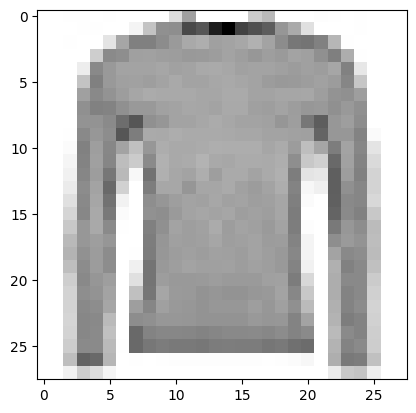

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.05098039 0.5764706  0.46666667
  0.47843137 0.47058824 0.48235294 0.5803922  0.56078434 0.5294118
  0.62352943 0.05098039 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.44313726 1.         1.
  1.         1.         0.9882353  1.         1.         0.98039216
  1.         0.3764706  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.49411765 0.99215686 0.84313726
  0.8862745  0.9019608  0.9098039  0.92156863 0.88235295 0.8509804
  0.98039216 0.44313726 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.6352

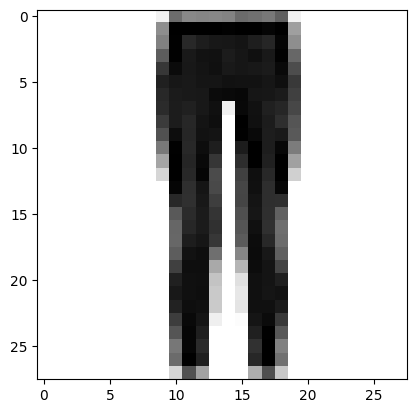

[[0.         0.         0.         0.         0.         0.
  0.         0.00784314 0.01176471 0.         0.         0.09411765
  0.8745098  0.8627451  0.87058824 0.80784315 0.27058825 0.
  0.         0.01176471 0.00784314 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.01568628 0.         0.         0.         0.         0.6392157
  1.         0.972549   0.96862745 1.         0.83137256 0.
  0.         0.         0.         0.01568628 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.32156864 0.7764706  1.         0.9098039
  0.8980392  0.9764706  0.9764706  0.9254902  0.8901961  0.972549
  0.7058824  0.4        0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.3254902  0.8352941  0.93333334 0.92156863 0.874

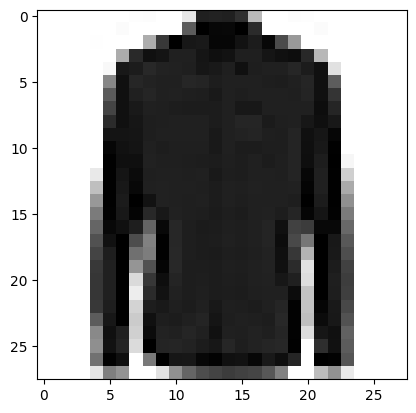

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.         0.14509805
  0.7529412  0.69411767 0.67058825 0.78039217 0.10588235 0.
  0.         0.         0.00392157 0.01176471 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.03529412 0.         0.         0.         0.         0.5294118
  0.9019608  0.63529414 0.60784316 0.99215686 0.6431373  0.05490196
  0.         0.         0.         0.         0.01176471 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.2509804  0.59607846 0.9098039  0.8117647
  0.7647059  0.60784316 0.6156863  0.7882353  0.8901961  0.8784314
  0.8666667  0.6745098  0.36862746 0.01568628 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.4392157  0.7019608  0.8039216  0.78039

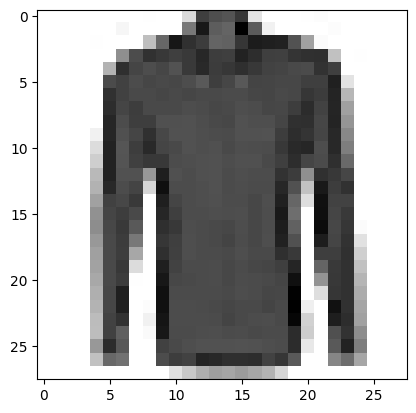

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

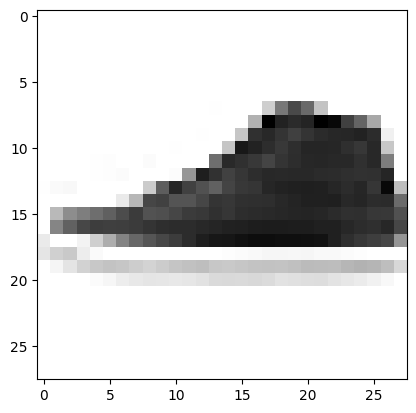

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

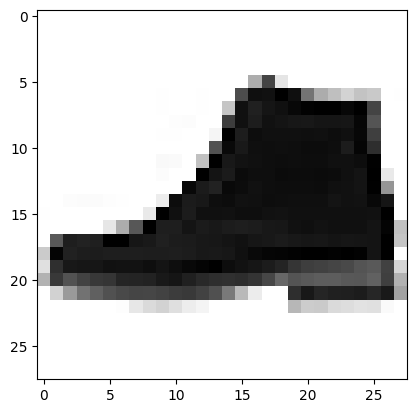

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

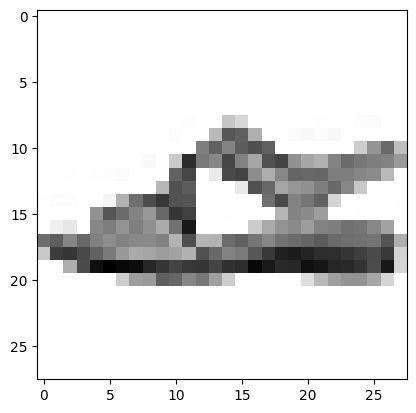

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00392157
  0.         0.13333334 0.45490196 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.7882353  0.99607843 0.96862745 1.         1.
  1.         1.         1.         1.         1.         1.
  0.5568628  0.         0.00392157 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00784314 0.
  0.26666668 0.8901961  0.8784314  0.93333334 0.9764706  0.95686275
  0.96862745 0.9607843  0.95686275 0.95686275 0.9529412  1.
  0.85490197 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

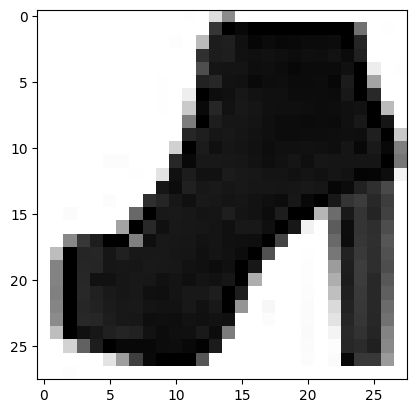

[[0.         0.         0.         0.00392157 0.         0.
  0.         0.         0.         0.13333334 0.5803922  0.7921569
  0.41960785 0.32941177 0.63529414 0.7764706  0.3529412  0.10196079
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.08235294 0.41960785 0.6509804  0.65882355 0.59607846 0.8
  0.93333334 0.972549   0.92941177 0.74509805 0.5568628  0.69803923
  0.61960787 0.38431373 0.06666667 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.21568628
  0.7372549  0.54901963 0.5137255  0.4745098  0.46666667 0.45490196
  0.57254905 0.6156863  0.5176471  0.4509804  0.53333336 0.49019608
  0.54901963 0.56078434 0.70980394 0.2        0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.654902
  0.5254902  0.44313726 0

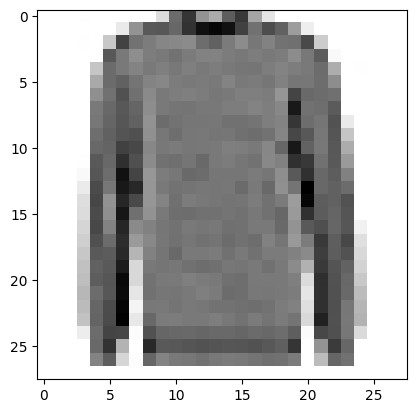

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

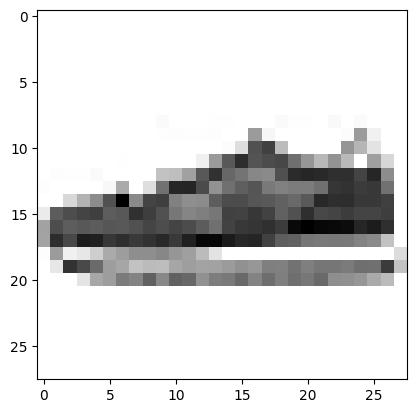

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.28627452 0.2509804  0.
  0.         0.         0.         0.         0.         0.48235294
  0.4392157  0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.25490198 0.827451   0.8666667  0.8862745  0.8156863
  0.69803923 0.38039216 0.46666667 0.7764706  0.8117647  0.8666667
  0.8666667  0.85490197 0.21960784 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.62352943 0.8980392  0.7882353  0.827451   0.8980392
  0.9411765  0.9254902  0.9019608  0.88235295 0.827451   0.81960785
  0.8039216  0.8980392  0.5686275  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.6784314  0.84705883 0.8    

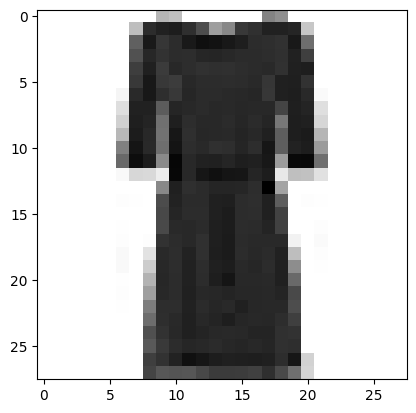

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.15294118 0.3529412  0.5294118  0.78431374
  0.5176471  0.23529412 0.2509804  0.3254902  0.7176471  0.7647059
  0.38039216 0.11372549 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.13725491
  0.49019608 0.7254902  0.78431374 0.7490196  0.62352943 0.6901961
  0.9137255  0.92941177 1.         0.9411765  0.83137256 0.6431373
  0.6784314  0.7882353  0.7490196  0.5019608  0.03921569 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.11372549 0.6745098
  0.67058825 0.62352943 0.5882353  0.5686275  0.60784316 0.5176471
  0.5019608  0.58431375 0.59607846 0.5411765  0.5058824  0.56078434
  0.5921569  0.5764706  0.6117647  0.67058825 0.6627451  0.15686275
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.61960787 0.6431373
  0.5

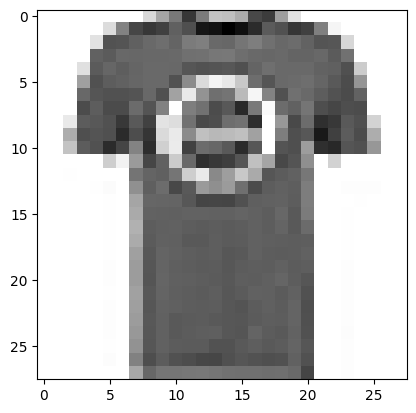

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.3254902
  0.59607846 0.22352941 0.32941177 0.6509804  0.44313726 0.12156863
  0.         0.         0.         0.         0.00784314 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.01176471 0.         0.         0.68235296 0.8235294  0.8901961
  0.9882353  0.8862745  0.90588236 0.9764706  0.88235295 0.8627451
  0.91764706 0.32156864 0.         0.00784314 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.69411767 0.9490196  0.8352941  0.827451
  0.83137256 0.85882354 0.84313726 0.8117647  0.827451   0.83137256
  0.8745098  0.9019608  0.16862746 0.         0.01960784 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.7647059  0

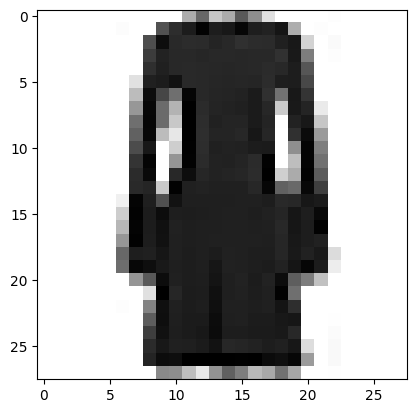

In [3]:
# Visualitzem les primeres 50 imatges
for i in range(50):
  print(f'{x_train[i]}')
  print(y_train[i])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.show()

In [4]:
# Definim el model de xarxa neuronal
# Si fem servir la capa keras.layers.Flatten() ens podem estalviar fer reshape
# de les dades d'entrada
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Mostrem el resum del model creat
model.summary()


c:\Users\Eric Escrich\Desktop\IAB_classe\IAB\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

# Configurem l'entrenament del nostre model de xarxa neuronal
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Iniciem l'entrenament
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 679us/step - accuracy: 0.6844 - loss: 1.0117
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8229 - loss: 0.5310
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8366 - loss: 0.4780
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8448 - loss: 0.4513
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8504 - loss: 0.4338
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8549 - loss: 0.4173
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8603 - loss: 0.4068
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.8643 - loss: 0.3904
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8666 - loss: 0.3854
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8690 - loss: 0.3754
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8708 - loss: 0.3680
Epoch 12

In [6]:
# Evaluem el model amb el conjunt de dades de test
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print('Precisió de test:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8780 - loss: 0.3366
Precisió de test: 0.8815000057220459


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
prediccio: Trouser
resposta correcte Trouser


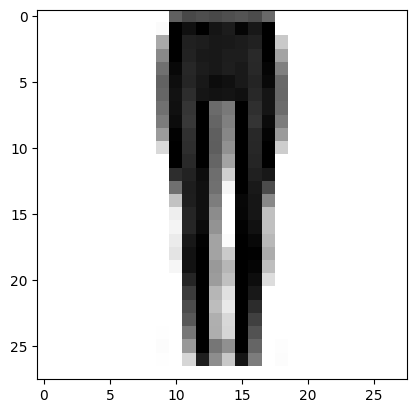

In [7]:
# Mostra la predicció que realitza la Xarxa neuronal de la imatge de test 777,
# la resposta correcta i la imatge corresponent
predictio = model.predict(x_test[777:778])


print('prediccio:', roba_labels[np.argmax(predictio)])
print('resposta correcte', roba_labels[np.argmax(y_test[777])])


plt.imshow(x_test[777].reshape(28, 28), cmap=plt.cm.binary)
plt.show()


## Part opcional 1

In [8]:
# Canvia l'optimitzador del model per tal d'obtenir una xarxa neuronal que
# millori l'encert del model anterior. Pots consultar-los a https://keras.io/api/optimizers/

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32)
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print('Precisió de test:', test_accuracy)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8757 - loss: 0.3469
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8857 - loss: 0.3131
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.8910 - loss: 0.2973
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8947 - loss: 0.2871
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.8997 - loss: 0.2714
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9061 - loss: 0.2550
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9086 - loss: 0.2466
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9117 - loss: 0.2367
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9157 - loss: 0.2295
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9166 - loss: 0.2226
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9175 - loss: 0.2191
Epoch 12

## Part opcional 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


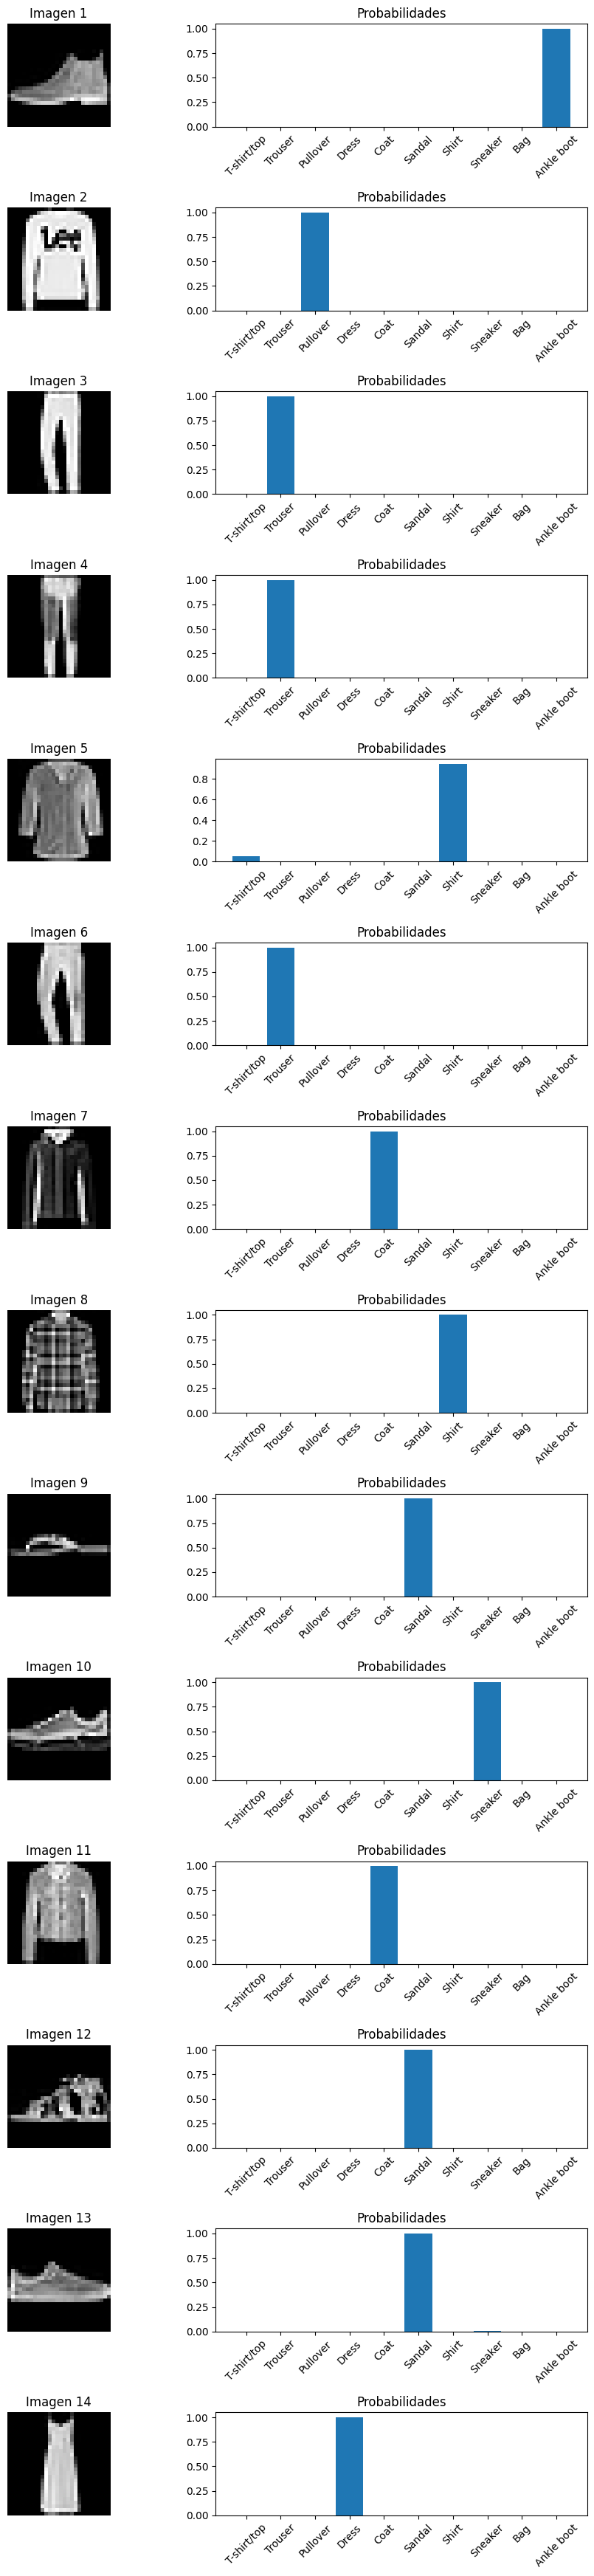

In [9]:
# Mostra les 14 primeres imatges de test, cada una amb un histograma al costat
# on es visualitzi la probabilitat de pertànyer a cada una de les classes

# Realizar predicciones sobre las primeras 14 imágenes de prueba
predictions = model.predict(x_test[:14])

# Crear una figura para mostrar las imágenes y los histogramas
fig, axes = plt.subplots(14, 2, figsize=(10, 35))

for i in range(14):
    # Mostrar la imagen
    axes[i, 0].imshow(x_test[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Imagen {i+1}')

    # Mostrar el histograma de probabilidades
    axes[i, 1].bar(range(10), predictions[i])
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_xticklabels(roba_labels, rotation=45)
    axes[i, 1].set_title('Probabilidades')

plt.tight_layout()
plt.show()